# False Positive and False Negative Error Bounds

##### Samantha Bothwell

July $9^{th}$, 2019

### False Positive 

Let's start with a definition of what a False Positive is. 

**False Positive**: Make the decision to reject the null hypothesis ($H_o$) when the null is true. 

This is the same as a Type I error. We know that the probability that you make a Type I error is $\alpha$ so,

<center>$P(\textrm{False Positive}) = P(\textrm{Reject $H_o$ | True $H_o$}) = \alpha$</center>

Since you can either have a false positive (we'll denote as $FP$) or not, we can say the following:

<center>$FP \sim Binomial(n,\alpha)$,<center>
    
where n is the number of trials. We expect the number of false positives to be $\mu = N\alpha$. The standard deviation, based on the binomial distribution, is $\sigma = \sqrt{n\alpha(1-\alpha)}$. The confidence interval around this mean will be 

<center>$\left[n\alpha - t_{\alpha/2}\sqrt{n\alpha(1-\alpha)}, n\alpha - t_{\alpha/2}\sqrt{n\alpha(1-\alpha)}\right]$<center>

Where $t_{\alpha/2}$ will be determined by the binomial distribution.


#### Calculation

Let's use $\alpha = 0.05$ and $n = 1000$.

The expected number of false positives is $1000 \times 0.05 = \boldsymbol{50}$.

The standard deviation is $\sqrt{1000 \times 0.05 (1-0.05)} = \boldsymbol{6.89}$

To determine the confidence interval we will use python:

In [15]:
print(binom.ppf((0.025,0.975), 1000, 0.05))


[37. 64.]


So, the 95% confidence interval for the number of false positives is **[37, 64]**. 

Unfortunately, we cannot know where our false positive lies. But we are 95% confident that the true number of false positives present are [37,64].

##### Simulation

Let's start with an easy example to determine the number of false positives. We will be using white noise - so we're testing the following hypothesis:
\begin{align}
H_0: &\mu = 0 \\
H_A: &\mu \neq 0
\end{align}

Since the samples are taken from a standard normal distribution we know our null is true. Let's see when we'll reject our null hypothesis.

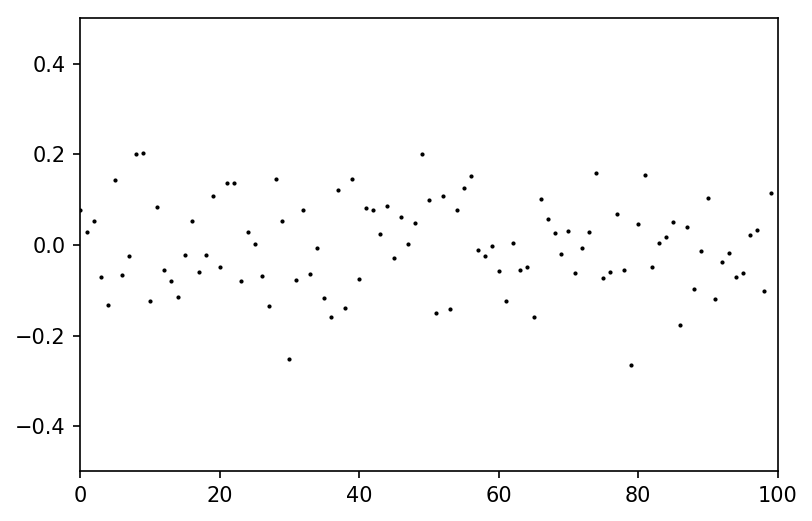

In [55]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

n = 100
matrix = np.zeros((n,4))
### Plot confidence intervals of the type 1 error rate
for i in range(n):
    white_noise = np.random.normal(0,1,100); 
    mean = np.mean(white_noise)
    var = np.var(white_noise)
    lower = mean - 1.96*np.sqrt(var/100)
    upper = mean + 1.96*np.sqrt(var/100)
    
    matrix[i,:] = [mean, var, lower, upper]
 
plt.figure()
plt.axis([0, n, -0.5, 0.5])
plt.plot(matrix[:,0],'ok',markersize = 1)
plt.plot(lower, upper, 'm', linewidth=3)
plt.show()


In [50]:
too_high = (0 < lower)
too_low = (0 > upper)

# Proportion of misses should be close to alpha
np.mean(too_low+too_high)

0.0